<a href="https://colab.research.google.com/github/germfsip/2231Procesamiento-digital-de-imagenes/blob/main/PDI_Clase8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Restauración  de imagenes

##Gerardo Mtz

Biblotecas

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Cargamos imagen de prueba

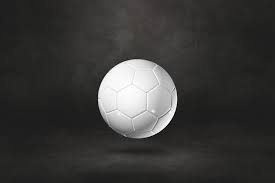

Tamaño =  (183, 275, 3)
Alto =  183
Ancho =  275
Valor max  =  255
Valor min  =  0


In [ ]:
img= cv2.imread("pelota.jfif")
cv2_imshow(img)


def medidas(imagen):
  print('Tamaño = ',imagen.shape)
  print('Alto = ',imagen.shape [0])
  print('Ancho = ',imagen.shape [1])
  print('Valor max  = ',np.max(imagen))
  print('Valor min  = ',np.min(imagen))

medidas(img)

Conversión escala de grises

Tamaño =  (183, 275, 3)
Alto =  183
Ancho =  275
Valor max  =  255
Valor min  =  0


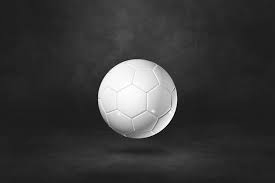

In [ ]:
#Por YIQ
img_grises3 = np.zeros(img.shape,np.uint8)
for i in range(img.shape[0]): #recorrer filar
  for j in range(img.shape[1]): #recorrer columnas
    img_grises3[i,j] = (img[i,j,2]*0.299 +img[i,j,1] * 0.587 + img[i,j,0]*0.114)
medidas(img_grises3)
cv2_imshow(img_grises3)

Histograma

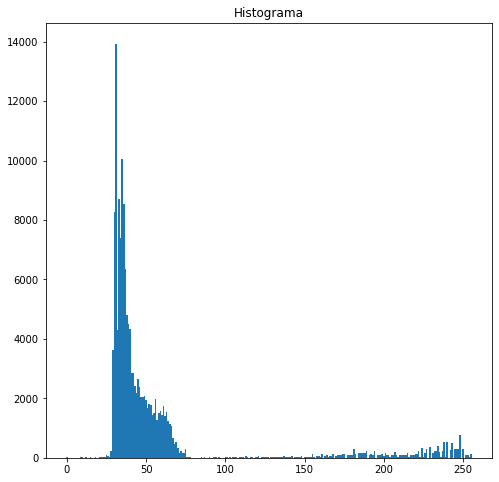

In [ ]:
rango = [0,256]
valores = 256
val, ran = np.histogram(img_grises3, valores, rango)
conteo = ran[:-1] 

def histograma(ejeX, imagen):
    fig, ax = plt.subplots(figsize=(8,8))
    plt.bar(ejeX, imagen, width=imagen.shape[0] / (ejeX[-1] - ejeX[0] + 1))
    return fig, ax

histograma(conteo, val)
plt.title("Histograma")
plt.show()

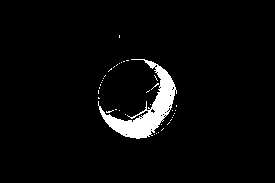

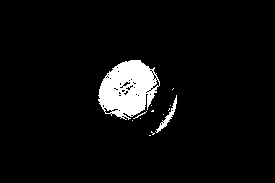

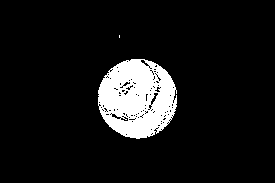

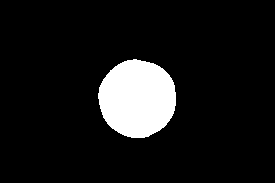

In [ ]:
kernel_bajo= np.array([80,80,80], np.uint8)
kernel_alto= np.array([200,200,200], np.uint8)
kernel2_bajo= np.array([210,210,210], np.uint8)
kernel2_alto= np.array([252,252,252], np.uint8)

decon= cv2.inRange(img_grises3, kernel_bajo, kernel_alto)
cv2_imshow(decon)
decon2= cv2.inRange(img_grises3, kernel2_bajo, kernel2_alto)
cv2_imshow(decon2)
kernel_total= cv2.add(decon, decon2)
cv2_imshow(kernel_total)
kernel_total = cv2.medianBlur(kernel_total, 13)

cv2_imshow(kernel_total)




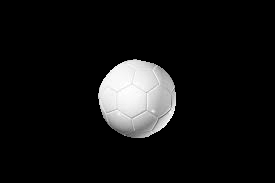

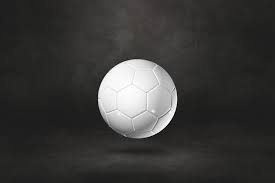

In [ ]:
sal = cv2.bitwise_and(img_grises3,img_grises3, mask = kernel_total)

cv2_imshow(sal)
cv2_imshow(img)